<a href="https://www.kaggle.com/code/ricktenbult/hotel-reservation-prediction?scriptVersionId=134110695" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Context  
It is important for hotels to be able to predict customer cancellations to optimize their operations and revenue management. By accurately forecasting cancellations, hotels can adjust their inventory, allocate resources efficiently, and offer vacant rooms to potential guests, reducing revenue loss and maximizing occupancy rates. Additionally, predictive cancellation models can help hotels improve customer satisfaction by proactively managing reservations and providing alternative options in case of cancellations, ensuring a seamless experience for all guests.

The dataset contains 36,275 instances and 19 attributes, of which 14 are quantitative input variables, 4 are qualitative input variables, and 1 qualitative output variable. Furthermore, the dataset contains no missing values and is in raw form.  

### Content 
The feature set includes: 
* Booking_ID: Unique identifier of each booking.
* no_of_adults: Number of adults.
* no_of_children: Number of children.
* no_of_weekend_nights: Number of weekend nights - Saturday or Sunday.
* no_of_week_nights: Number of week nights - Monday to Friday.
* type_of_meal_plane: Type of meal plan booked by the customer.
* required_car_parking_space: Does the customer require a car parking space? - 0: No, 1: Yes.
* room_type_reserved: Type of room reserved by the customer.
* lead_time: Number of days between the date of booking and the arrival date.
* arrival_year: Year of arrival date.
* arrival_month: Month of arrival date.
* arrival_date: Date of the month.
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? - 0: No, 1: Yes.
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking.
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking.
* avg_price_per_room: Average price per day of the reservation, in euros; prices of the rooms are dynamic.
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc).
* booking_status: Flag indicating if the booking was canceled or not.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import feature engineering libraries 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Import performance metrics libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Import classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
# Load the dataset
data = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")

# Create a copy of the dataset
df = data.copy()

# Define the target variable
TARGET = "booking_status"

In [3]:
# Print the shape of the dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 36275 rows and 19 columns.


In [4]:
# Show the first 5 rows of the dataset
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
# Return general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
# Return descriptive statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [7]:
# Drop the "Booking_ID" column from the dataset, given that the column is irrelevant
df.drop(columns=["Booking_ID"], axis=1, inplace=True)

In [8]:
def select_columns(df: pd.DataFrame, treshold: int = 10) -> list[str]:
    """
    Function used to divide the columns of a DataFrame in discrete and continuous based on the specified treshold.

    Args:
        df (pd.DataFrame): A DataFrame containing the columns to be selected.
        treshold (int): A threshold defining the minimum number of unique values. Default is 10.

    Returns:
        discrete_columns (list[str]): A list of discrete column names.
        continuous_columns (list[str]): A list of continuous column names.
    """
    
    # Initialize the discrete columns list
    discrete_columns = []

    for column in df.columns:
        # Select the columns with number of unique values less than or equal to the treshold
        if df[column].nunique() <= treshold:
            # Append the selected columns to the list of discrete columns
            discrete_columns.append(column)
    
    # Select the continuous columns
    continuous_columns = [col for col in df.columns.tolist() if col not in discrete_columns]


    return discrete_columns, continuous_columns

In [9]:
# Apply the select_columns function
discrete_columns, continuous_columns = select_columns(df)

In [10]:
# Return the discrete and continuous columns
discrete_columns, continuous_columns

(['no_of_adults',
  'no_of_children',
  'no_of_weekend_nights',
  'type_of_meal_plan',
  'required_car_parking_space',
  'room_type_reserved',
  'arrival_year',
  'market_segment_type',
  'repeated_guest',
  'no_of_previous_cancellations',
  'no_of_special_requests',
  'booking_status'],
 ['no_of_week_nights',
  'lead_time',
  'arrival_month',
  'arrival_date',
  'no_of_previous_bookings_not_canceled',
  'avg_price_per_room'])

In [11]:
def visualizations_discrete(df: pd.DataFrame):
    """
    Function used to plot countplots for each discrete column.

    Parameters:
        - df (pd.DataFrame): A DataFrame containing the data.
    """

    # Set the figure size and layout
    fig, axes = plt.subplots(nrows=len(discrete_columns), ncols=2, figsize=(12, 6 * len(discrete_columns)))
    fig.subplots_adjust(hspace=0.25)
    sns.color_palette("Blues", as_cmap=True)
    
    for index, column in enumerate(discrete_columns):
        # Plot countplot
        sns.countplot(data=df, x=column, ax=axes[index, 0], palette="blend:#7AB,#EDA")
        axes[index, 0].set_title(f"Countplot of {column}")
        axes[index, 0].set_xlabel("")

        # Plot countplot
        sns.countplot(data=df, x=column, hue=TARGET, ax=axes[index, 1], palette="blend:#7AB,#EDA")
        axes[index, 1].set_title(f"Countplot of {column} specified by {TARGET}")
        axes[index, 1].set_xlabel("")  

    # Show the plot
    plt.show()

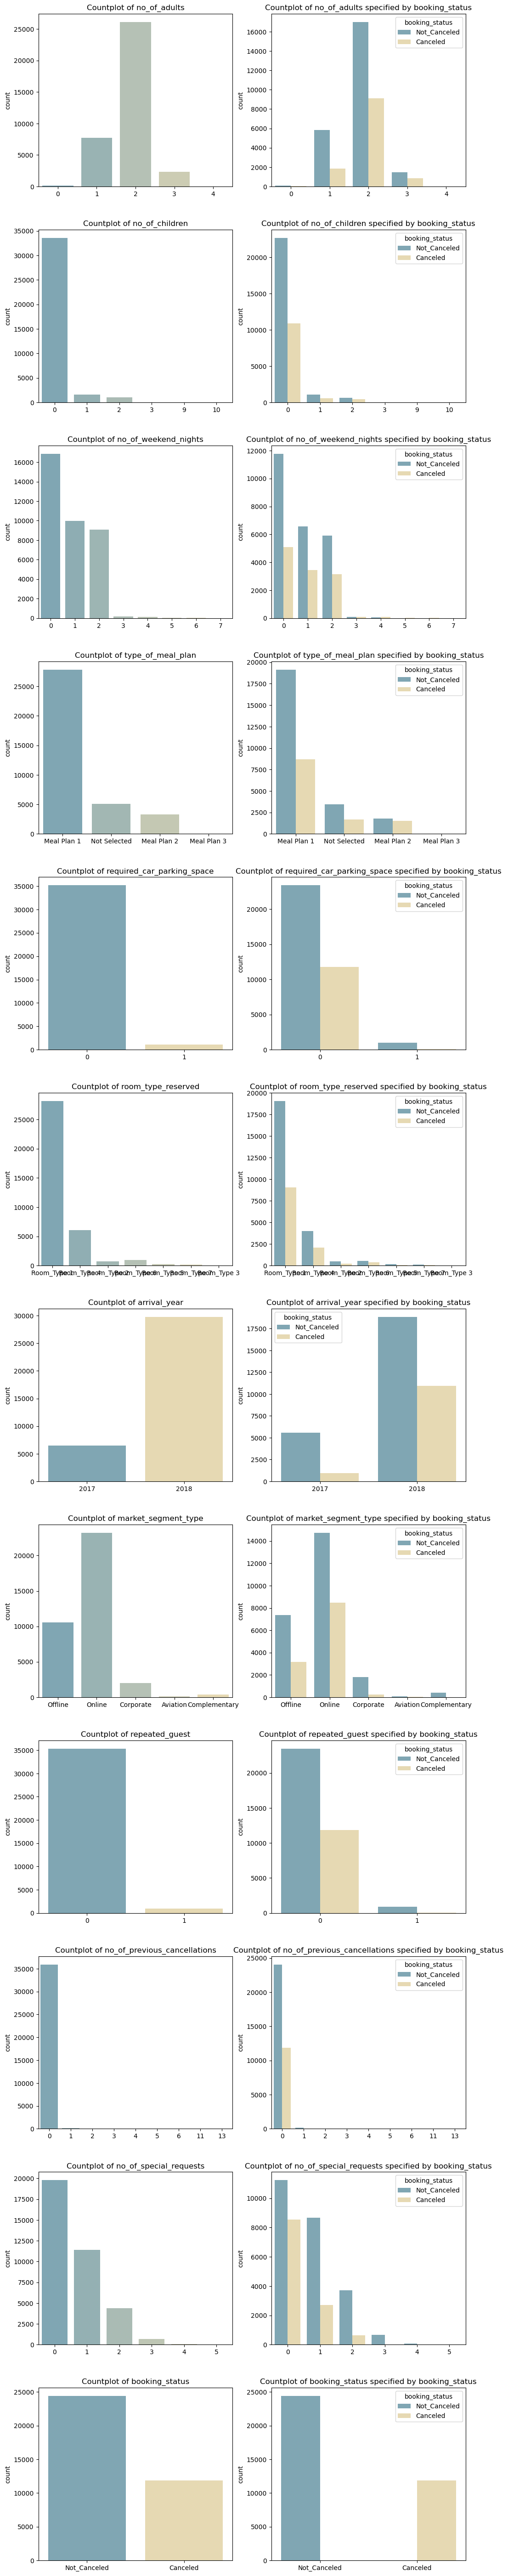

In [12]:
# Apply the visualizations_discrete function
visualizations_discrete(df)

Based on the figures above, the following conclusions can be drawn:
* The number of special reservations is an indicator of booking status. The proportion of canceled reservations decreases as the number of requests increases.

In [13]:
def visualizations_continuous(df: pd.DataFrame, target: str):
    """
    Function used to plot the boxplot and distribution for each continuous column.

    Parameters:
        - df (pd.DataFrame): A DataFrame containing the data.
        - target (str): The target variable of a DataFrame.
    """
    
    # Set the figure size and layout
    fig, axes = plt.subplots(nrows=len(continuous_columns), ncols=2, figsize=(12, 6 * len(continuous_columns)))
    fig.tight_layout(pad=2.0)

    for index, column in enumerate(continuous_columns):
        # Plot boxplot
        sns.boxplot(data=df, x=TARGET, y=column, ax=axes[index, 0], palette="blend:#7AB,#EDA")
        axes[index, 0].set_title(f"Boxplot of {column}")
        axes[index, 0].set_xlabel("")

        # Plot distribution
        sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1], palette="blend:#7AB,#EDA")
        axes[index, 1].set_title(f"Distribution of {column}")
        axes[index, 1].set_xlabel("")
        
    # Show the plot
    plt.show()

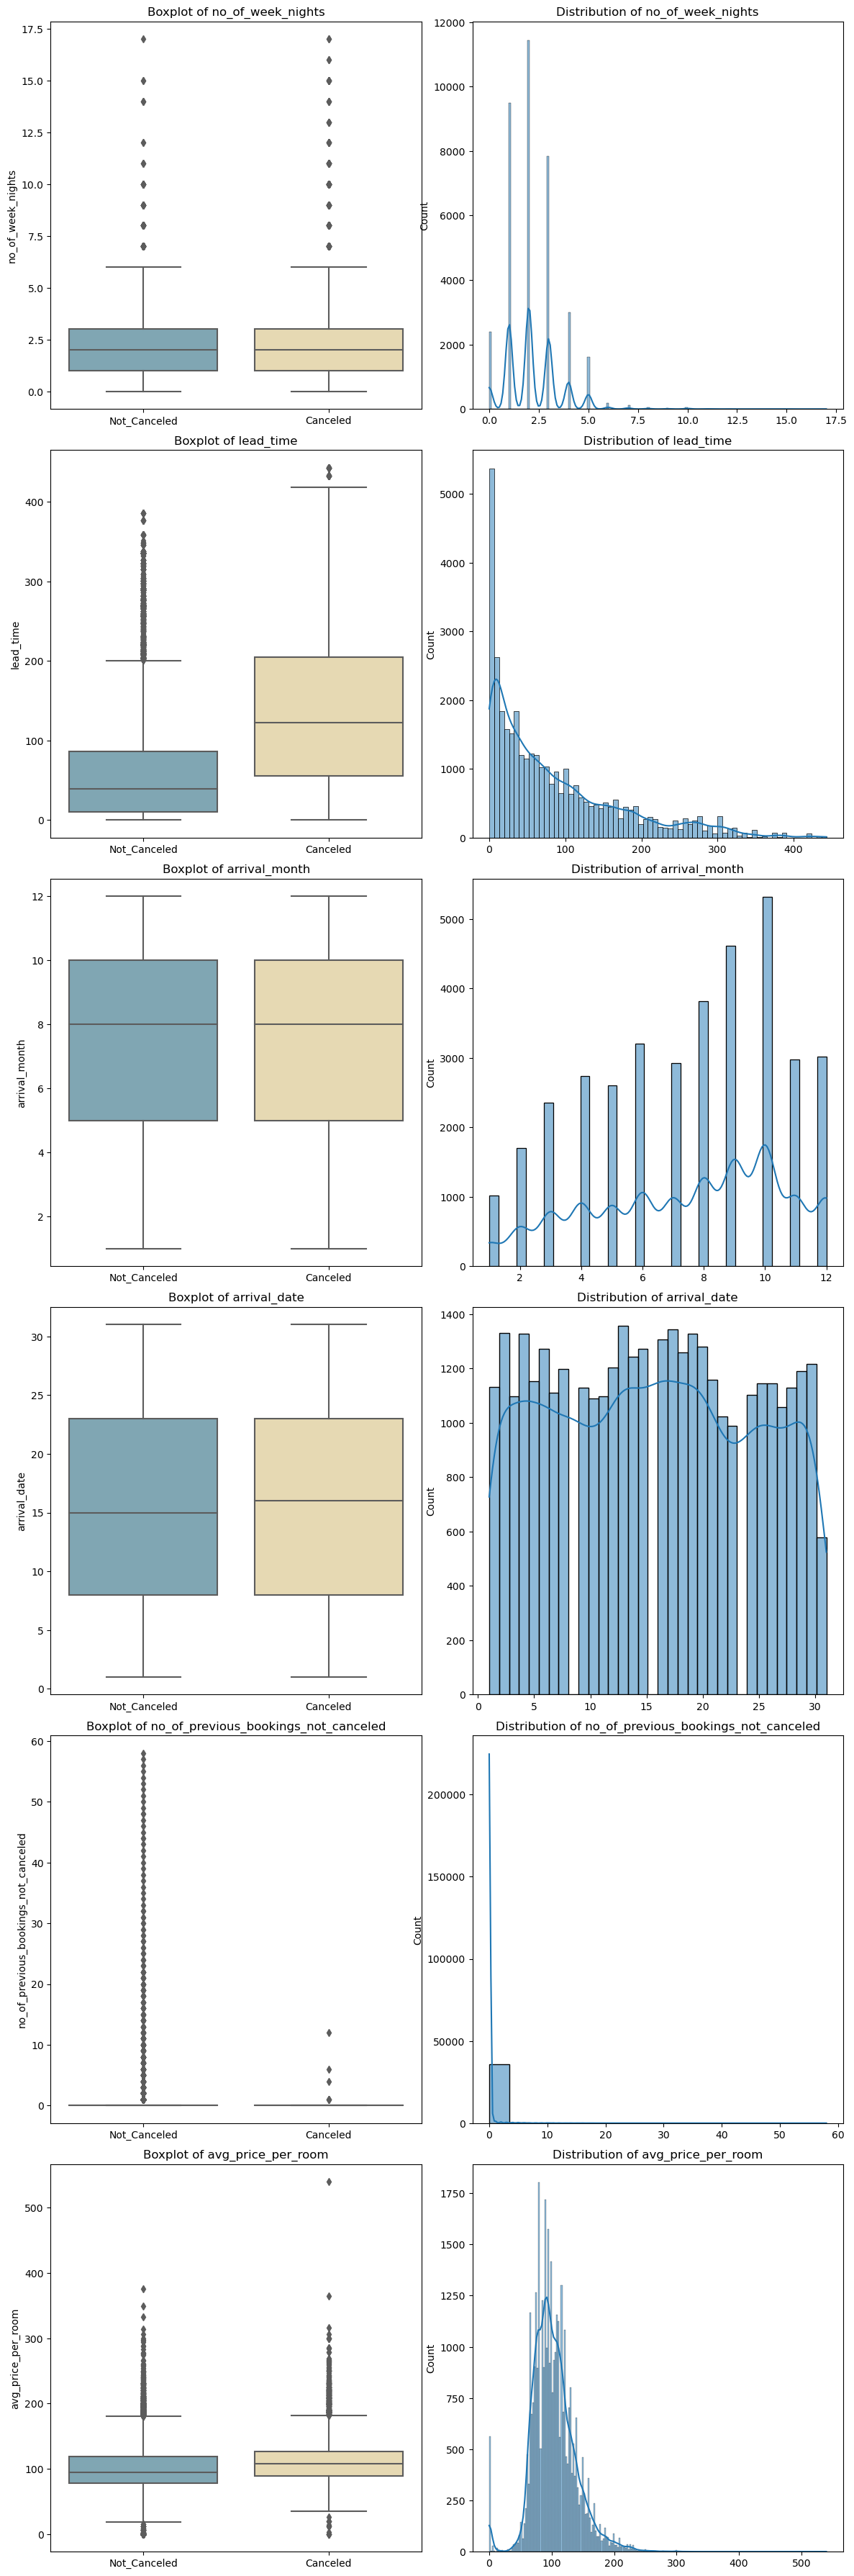

In [14]:
# Apply the visualizations_continuous function
visualizations_continuous(df, target=TARGET)

Based on the figures above, the following conclusions can be drawn:
* The lead time is an indicator of booking status. The proportion of canceled reservations decreases as the lead time requests increases.

In [15]:
def replace_outliers(df: pd.DataFrame, inner_fence_multiplier: float = 1.5, outer_fence_multiplier: float = 3.0) -> pd.DataFrame:
    """
    Function used to replace outliers in each continuous column with the mean value.

    Parameters:
        - df (pd.DataFrame): A DataFrame containing the data.
        - inner_fence_multiplier (float): A multiplier to determine the inner fence. Default is 1.5.
        - outer_fence_multiplier (float): A multiplier to determine the outer fence. Default is 3.0.

    Returns:
        - df (pd.DataFrame): A DataFrame with outliers replaced by the mean value.
    """

    for column in continuous_columns:
        # Calculate the Interquartile Range (IQR)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the inner and outer fences
        inner_fence_low = Q1 - inner_fence_multiplier * IQR
        inner_fence_high = Q3 + inner_fence_multiplier * IQR
        outer_fence_low = Q1 - outer_fence_multiplier * IQR
        outer_fence_high = Q3 + outer_fence_multiplier * IQR

        # Identify the outliers using the inner and outer fences
        outliers = (df[column] < inner_fence_low) | (df[column] > inner_fence_high) | \
                   (df[column] < outer_fence_low) | (df[column] > outer_fence_high)

        # Replace the outliers with the mean value
        df.loc[outliers, column] = df[column].mean()


    return df

In [16]:
# Apply the replace_outliers function to the dataset
df = replace_outliers(df)

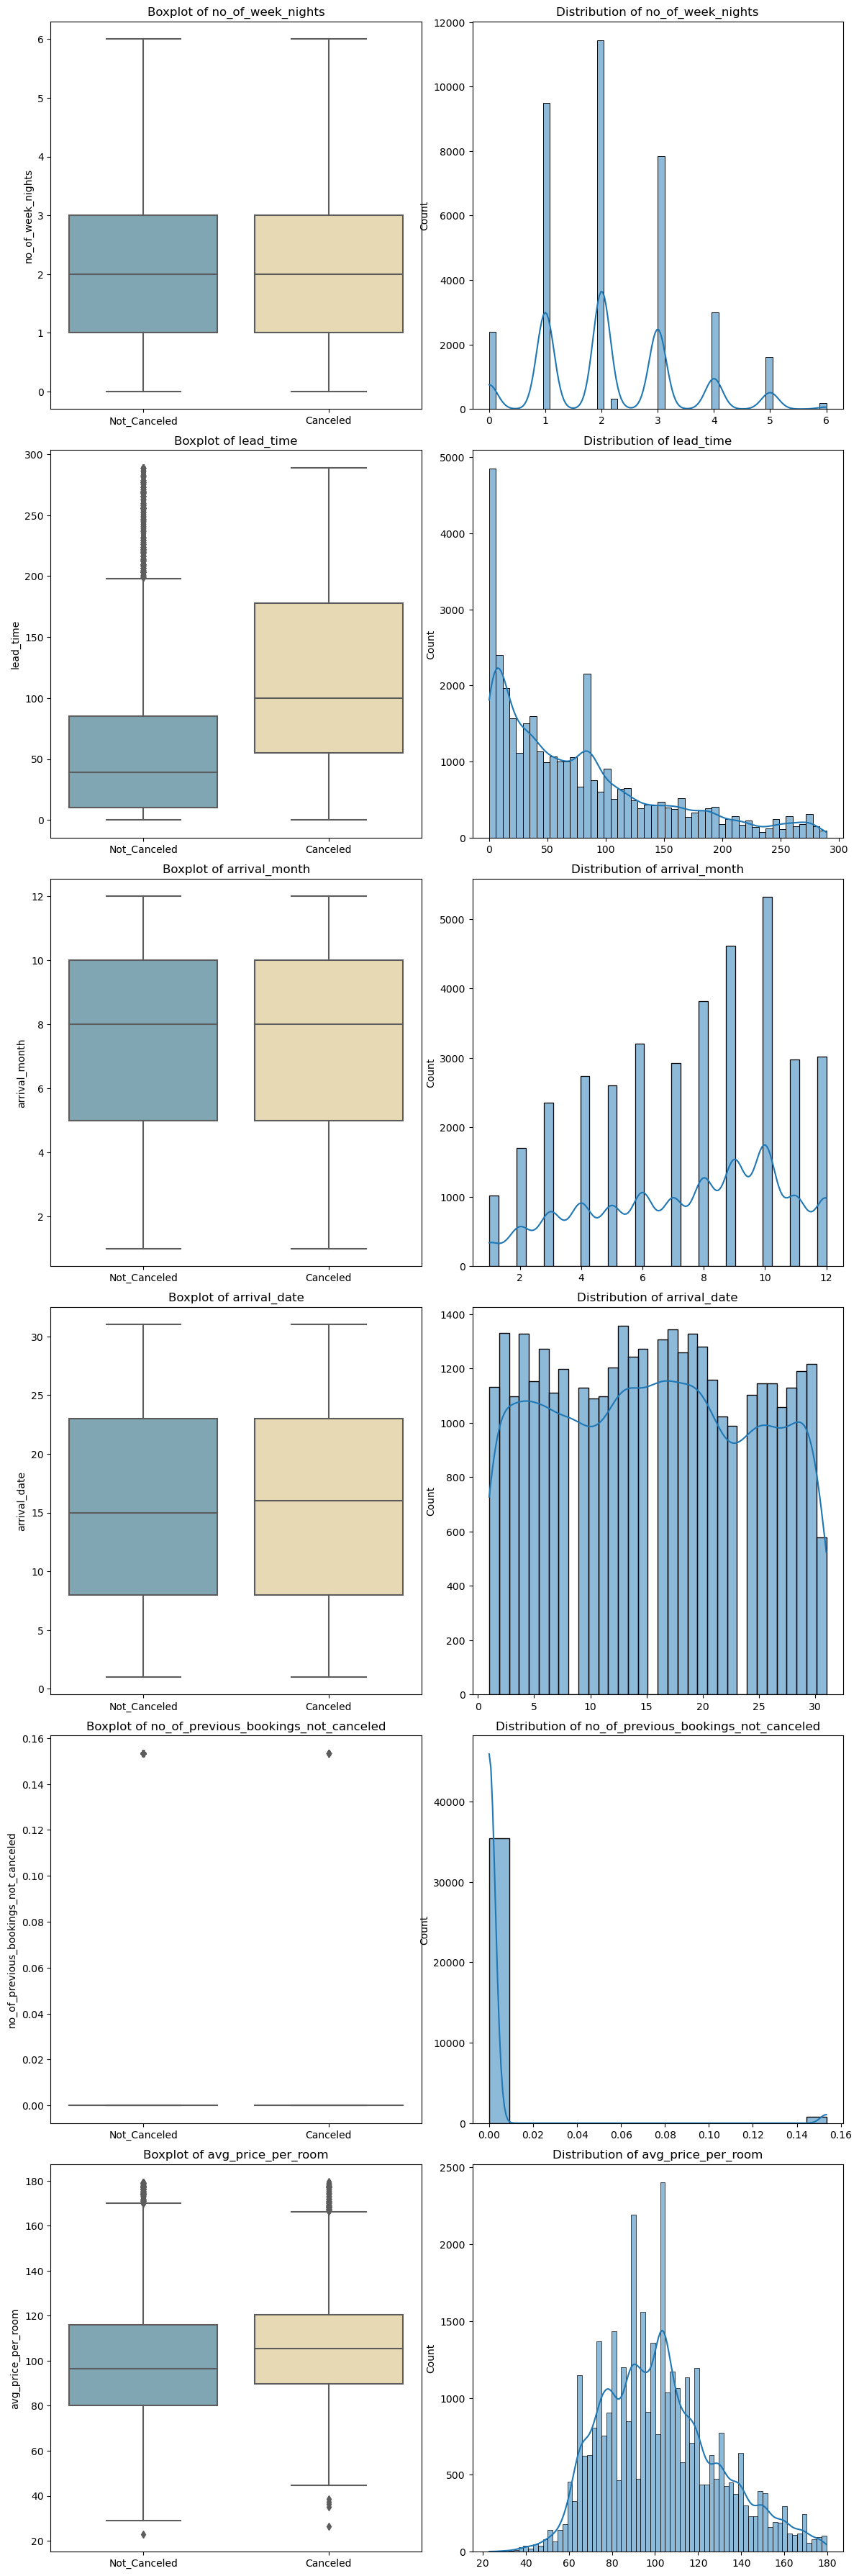

In [17]:
# Re-apply the visualizations_continuous function
visualizations_continuous(df, target=TARGET)

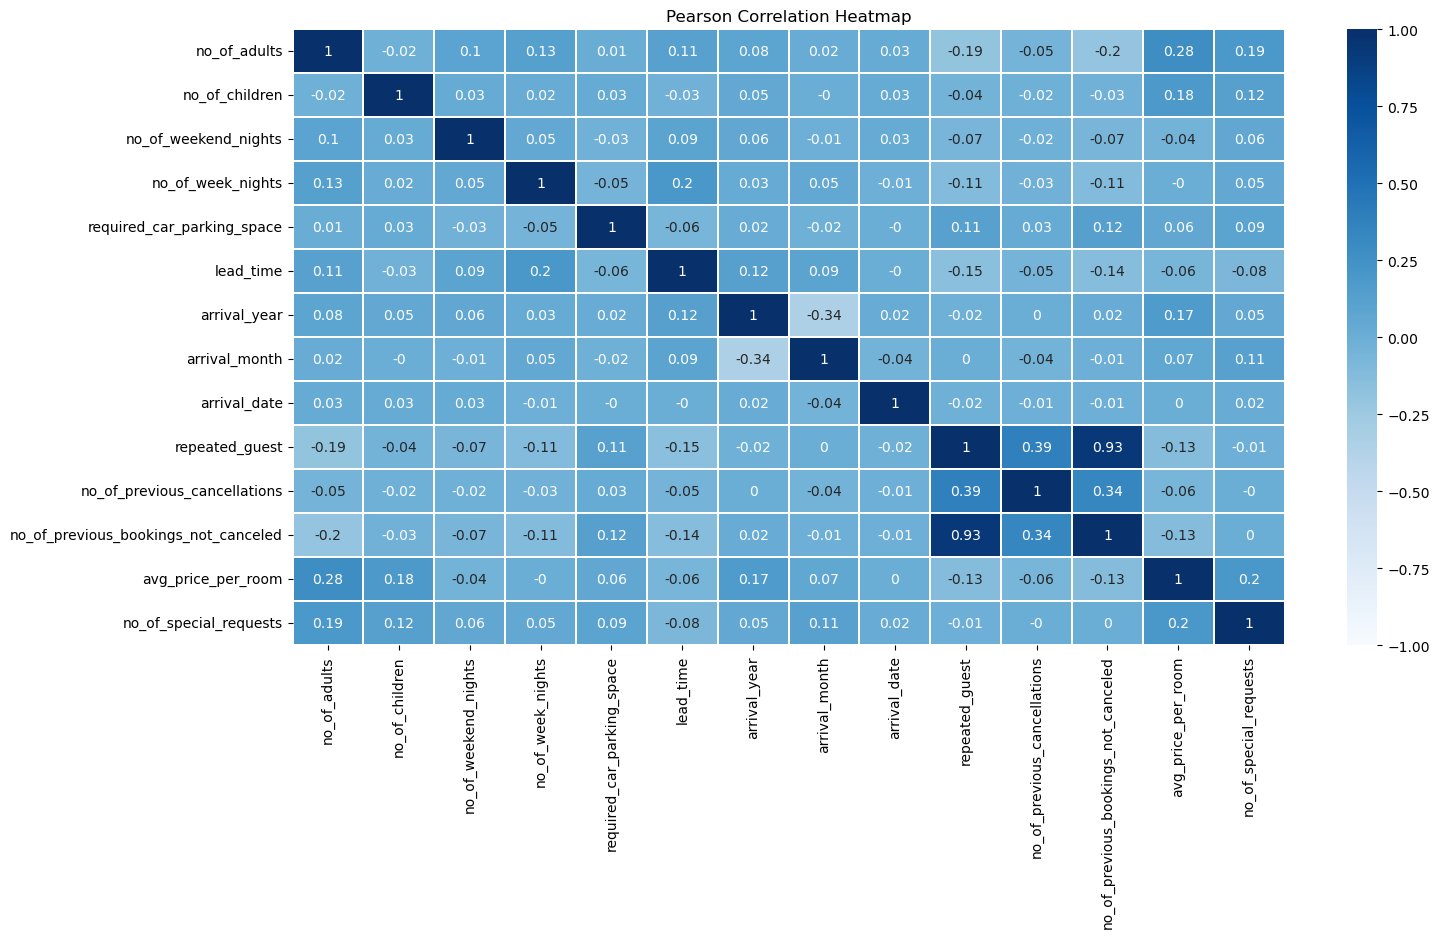

In [18]:
# Set the figure size and layout
plt.figure(figsize=(16,8))
plt.tight_layout(pad=2.0)

# Plot the correlation between the features
corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap="Blues", linewidths=0.2, fmt=".2g", vmin=-1, vmax=1)
plt.title("Pearson Correlation Heatmap")

# Show the plot
plt.show()

In [19]:
# Define the label enconder and the ordinal enconder
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

# Columns for label and ordinal encoding
label_columns = ["market_segment_type", "booking_status"]
ordinal_columns = ["type_of_meal_plan", "room_type_reserved"]

# Apply the label encoder
df[label_columns] = df[label_columns].apply(label_encoder.fit_transform)

# Apply the ordinal encoder
df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])

In [20]:
# Generate a single principle component for each set of variables
pca = PCA(n_components=1)

# Select the "no_of_adults" and "no_of_children" columns and transform the data based on the calculated principal component
pca_no_people = pca.fit_transform(df[["no_of_adults","no_of_children"]])

# Create a new column and assign the values from "pca_no_people" to the column
df["no_of_people"] = pca_no_people

# Drop the "no_of_adults" and "no_of_children" columns from the dataset
df.drop(columns=["no_of_adults","no_of_children"], axis=1, inplace=True)

# Select the "no_of_weekend_nights" and "no_of_week_nights" columns and transform the data based on the calculated principal component
pca_no_week = pca.fit_transform(df[["no_of_weekend_nights","no_of_week_nights"]])

# Create a new column and assign the values from "pca_no_week" to the column
df["no_of_week_days"] = pca_no_week

# Drop the "no_of_weekend_nights" and "no_of_week_nights" columns from the dataset
df.drop(columns=["no_of_weekend_nights","no_of_week_nights"], axis=1, inplace=True)

In [21]:
# Split the dataset into X and y, representing the features and the target variable
X = df.drop(columns=[TARGET], axis=1)
y = df[TARGET]

In [22]:
# Prespecify the random state
RANDOM_STATE = 2

# Perform a train-test split on the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

# Return the size of X_train and X_test
print(f"Size of training data: {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"Size of testing data: {X_test.shape[0]} rows and {X_test.shape[1]} columns.")

Size of training data: 25392 rows and 15 columns.
Size of testing data: 10883 rows and 15 columns.


In [23]:
# Define the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [24]:
# Define the oversampler
oversampler = RandomOverSampler(random_state=RANDOM_STATE)

# Oversample the minority class
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)

# Define the undersampler
undersampler = RandomUnderSampler(random_state=RANDOM_STATE)

# Undersample the majority class
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_scaled, y_train)

In [25]:
# Define the base models to be trained and evaluated
base_models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(random_state=RANDOM_STATE),
    "XGBClassifier": XGBClassifier(random_state=RANDOM_STATE),
    "BaggingClassifier": BaggingClassifier(random_state=RANDOM_STATE),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "CatBoostClassifier": CatBoostClassifier(random_state=RANDOM_STATE, verbose=50),
    "ExtraTreesClassifier": ExtraTreesClassifier(random_state=RANDOM_STATE),
}

In [26]:
def train_and_evaluate_models_with_sampling(models: dict) -> pd.DataFrame:
    """
    Function used to fit, predict, and evaluate different models using both oversampling and undersampling.

    Parameters:
        - models (dict): A dictionary of model names and model objects.

    Returns:
        - base_results (pd.DataFrame): A DataFrame containing the performance for each base model.
    """
    
    # Initialize the base results DataFrame
    base_results = pd.DataFrame(columns=["Accuracy", "Recall", "Precision", "F1"])

    for model_name, model in models.items():
    # Train the model on oversampled data
        # Fit the model
        model.fit(X_train_oversampled, y_train_oversampled)

        # Predict the target variable
        y_pred_oversampled = model.predict(X_test_scaled)

        # Calculate the evaluation metrics
        accuracy_oversampled = round(accuracy_score(y_test, y_pred_oversampled),3)
        recall_oversampled = round(recall_score(y_test, y_pred_oversampled),3)
        precision_oversampled = round(precision_score(y_test, y_pred_oversampled),3)
        f1_oversampled = round(f1_score(y_test, y_pred_oversampled),3)

        # Store the results in the DataFrame
        base_results.loc[f"{model_name} (Oversampled)"] = [accuracy_oversampled, recall_oversampled,
                                                      precision_oversampled, f1_oversampled]
        
    # Train the model on undersampled data
        # Fit the model
        model.fit(X_train_undersampled, y_train_undersampled)

        # Predict the target variable
        y_pred_undersampled = model.predict(X_test_scaled)

        # Calculate the evaluation metrics
        accuracy_undersampled = round(accuracy_score(y_test, y_pred_undersampled),3)
        recall_undersampled = round(recall_score(y_test, y_pred_undersampled),3)
        precision_undersampled = round(precision_score(y_test, y_pred_undersampled),3)
        f1_undersampled = round(f1_score(y_test, y_pred_undersampled),3)

        # Store the results in the DataFrame
        base_results.loc[f"{model_name} (Undersampled)"] = [accuracy_undersampled, recall_undersampled,
                                                       precision_undersampled, f1_undersampled]

    # Sort the base results in descending order of accuracy
    base_results.sort_values(by="Accuracy", ascending=False, inplace=True)


    return base_results

In [27]:
# Apply the train_and_evaluate_models_with_sampling function
base_results = train_and_evaluate_models_with_sampling(base_models)

Learning rate set to 0.046581
0:	learn: 0.6659183	total: 66.6ms	remaining: 1m 6s
50:	learn: 0.4116472	total: 491ms	remaining: 9.13s
100:	learn: 0.3765160	total: 890ms	remaining: 7.92s
150:	learn: 0.3540714	total: 1.29s	remaining: 7.27s
200:	learn: 0.3380587	total: 1.71s	remaining: 6.81s
250:	learn: 0.3236330	total: 2.12s	remaining: 6.34s
300:	learn: 0.3109578	total: 2.53s	remaining: 5.88s
350:	learn: 0.3016351	total: 2.94s	remaining: 5.43s
400:	learn: 0.2934488	total: 3.35s	remaining: 5s
450:	learn: 0.2858283	total: 3.76s	remaining: 4.58s
500:	learn: 0.2790460	total: 4.16s	remaining: 4.15s
550:	learn: 0.2730572	total: 4.58s	remaining: 3.73s
600:	learn: 0.2672447	total: 5.02s	remaining: 3.33s
650:	learn: 0.2617587	total: 5.43s	remaining: 2.91s
700:	learn: 0.2569479	total: 5.83s	remaining: 2.49s
750:	learn: 0.2521551	total: 6.23s	remaining: 2.06s
800:	learn: 0.2476898	total: 6.63s	remaining: 1.65s
850:	learn: 0.2434959	total: 7.04s	remaining: 1.23s
900:	learn: 0.2391183	total: 7.44s	rema

In [28]:
# Show the results of the trained and evaluated models
base_results

,Accuracy,Recall,Precision,F1
Random Forest Classifier (Oversampled),0.897,0.927,0.920,0.923
ExtraTreesClassifier (Oversampled),0.892,0.932,0.908,0.920
Random Forest Classifier (Undersampled),0.884,0.887,0.936,0.911
XGBClassifier (Oversampled),0.883,0.892,0.930,0.911
BaggingClassifier (Oversampled),0.882,0.897,0.924,0.910
CatBoostClassifier (Oversampled),0.879,0.888,0.929,0.908
CatBoostClassifier (Undersampled),0.874,0.877,0.930,0.903
XGBClassifier (Undersampled),0.872,0.874,0.929,0.901
ExtraTreesClassifier (Undersampled),0.869,0.867,0.932,0.899
BaggingClassifier (Undersampled),0.860,0.847,0.937,0.890


In [29]:
def tune_and_evaluate_models(gridsearch_model: dict, param_grid: dict) -> pd.DataFrame:
    """
    Function used to tune the hyperparameters of selected models and evaluate the tuned models.

    Parameters:
        - gridsearch_model (dict): A dictionary of model names and model objects.
        - param_grid (dict): A dictionary of model names and parameter grids for hyperparameter tuning.

    Returns:
        - tuned_model: A model containing the tuned hyperparameters.
        - tuned_results (pd.DataFrame): A DataFrame containing the performance for each model, including the tuned and base models.
    """

    for model_name, model in gridsearch_model.items():
        if model_name in param_grid:
            param_grid = param_grid[model_name]

            # Perform hyperparameter tuning using GridSearchCV
            model_gridsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring="accuracy")
            model_gridsearch.fit(X_train, y_train)

            # Retrieve the tuned model with the best estimators
            tuned_model = model_gridsearch.best_estimator_
            
            # Add the tuned models to the base_models dictionary
            base_models[f"Tuned {model_name}"] = tuned_model

    # Re-apply the train_and_evaluate_models_with_sampling function with both the base models and the tuned model
    tuned_results = train_and_evaluate_models_with_sampling(base_models)


    return tuned_model, tuned_results

In [30]:
# Define the model to be tuned
gridsearch_model = {"Random Forest Classifier": RandomForestClassifier(random_state=RANDOM_STATE)}

# Define the parameter grid
param_grid = {
    "Random Forest Classifier": {
        "n_estimators": [200, 225, 275, 300],
        "max_depth": [None, 5, 10],
    }
}

In [31]:
# Apply the tune_and_evaluate function
tuned_model, tuned_results = tune_and_evaluate_models(gridsearch_model, param_grid)

Learning rate set to 0.046581
0:	learn: 0.6659183	total: 9.82ms	remaining: 9.81s
50:	learn: 0.4116472	total: 445ms	remaining: 8.28s
100:	learn: 0.3765160	total: 849ms	remaining: 7.56s
150:	learn: 0.3540714	total: 1.27s	remaining: 7.15s
200:	learn: 0.3380587	total: 1.7s	remaining: 6.74s
250:	learn: 0.3236330	total: 2.11s	remaining: 6.29s
300:	learn: 0.3109578	total: 2.57s	remaining: 5.96s
350:	learn: 0.3016351	total: 3.1s	remaining: 5.73s
400:	learn: 0.2934488	total: 3.61s	remaining: 5.39s
450:	learn: 0.2858283	total: 4.09s	remaining: 4.97s
500:	learn: 0.2790460	total: 4.51s	remaining: 4.49s
550:	learn: 0.2730572	total: 4.92s	remaining: 4.01s
600:	learn: 0.2672447	total: 5.33s	remaining: 3.54s
650:	learn: 0.2617587	total: 5.74s	remaining: 3.08s
700:	learn: 0.2569479	total: 6.16s	remaining: 2.63s
750:	learn: 0.2521551	total: 6.56s	remaining: 2.17s
800:	learn: 0.2476898	total: 6.95s	remaining: 1.73s
850:	learn: 0.2434959	total: 7.36s	remaining: 1.29s
900:	learn: 0.2391183	total: 7.77s	rem

In [32]:
# Show the hyperparameters of the tuned model
tuned_model

RandomForestClassifier(n_estimators=275, random_state=2)

In [33]:
# Show the results of the tuned and evaluated models
tuned_results

,Accuracy,Recall,Precision,F1
Tuned Random Forest Classifier (Oversampled),0.898,0.927,0.920,0.924
Random Forest Classifier (Oversampled),0.897,0.927,0.920,0.923
ExtraTreesClassifier (Oversampled),0.892,0.932,0.908,0.920
Tuned Random Forest Classifier (Undersampled),0.886,0.890,0.936,0.913
Random Forest Classifier (Undersampled),0.884,0.887,0.936,0.911
XGBClassifier (Oversampled),0.883,0.892,0.930,0.911
BaggingClassifier (Oversampled),0.882,0.897,0.924,0.910
CatBoostClassifier (Oversampled),0.879,0.888,0.929,0.908
CatBoostClassifier (Undersampled),0.874,0.877,0.930,0.903
XGBClassifier (Undersampled),0.872,0.874,0.929,0.901


The improvement in both accuracy and F1 score is negligible.

In [34]:
hyperparameters = tuned_model.get_params()

# Define the Random Forest Classifier
model = RandomForestClassifier(**hyperparameters)

# Fit the model to the data
model.fit(X_train_oversampled, y_train_oversampled)

# Predict the target variable
y_pred_oversampled = model.predict(X_test_scaled)

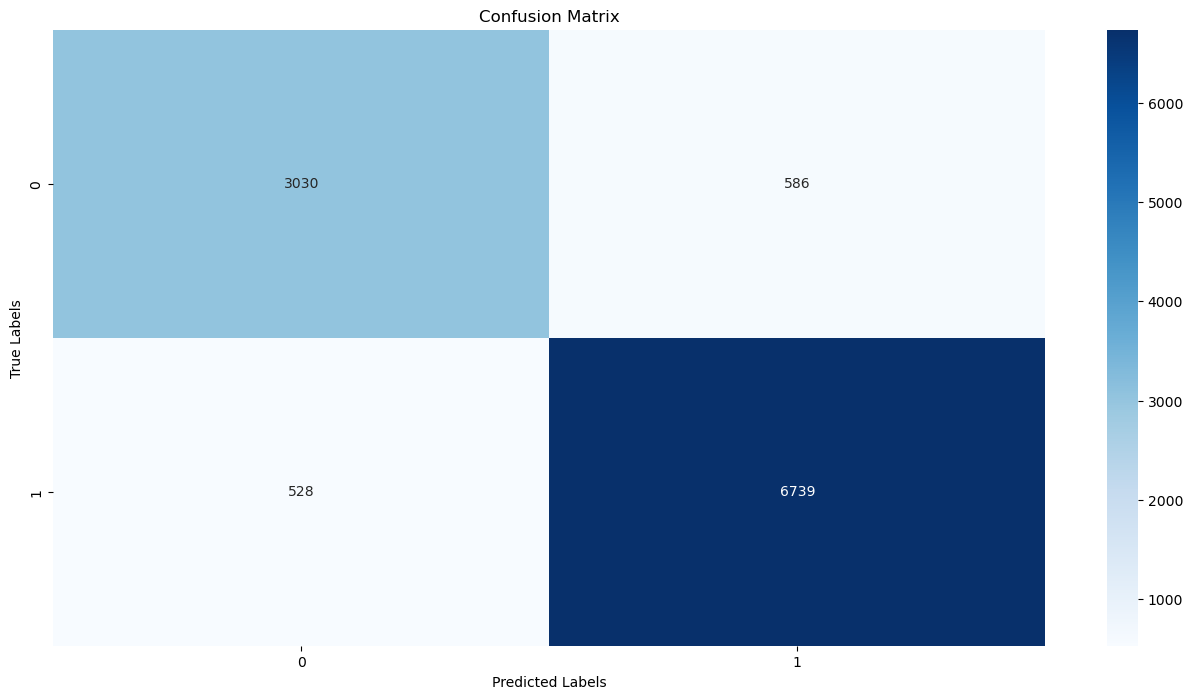

In [35]:
# Create the confusion matrix
matrix = confusion_matrix(y_test, y_pred_oversampled)

# Create a DataFrame from the confusion matrix
matrix_df = pd.DataFrame(matrix, index=np.unique(df[TARGET]), columns=np.unique(df[TARGET]))

# Set the figure size and layout
plt.figure(figsize=(16,8))
plt.tight_layout(pad=2.0)

# Create a heatmap for the confusion matrix
sns.heatmap(matrix_df, annot=True, cmap="Blues", fmt="d")

# Add labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

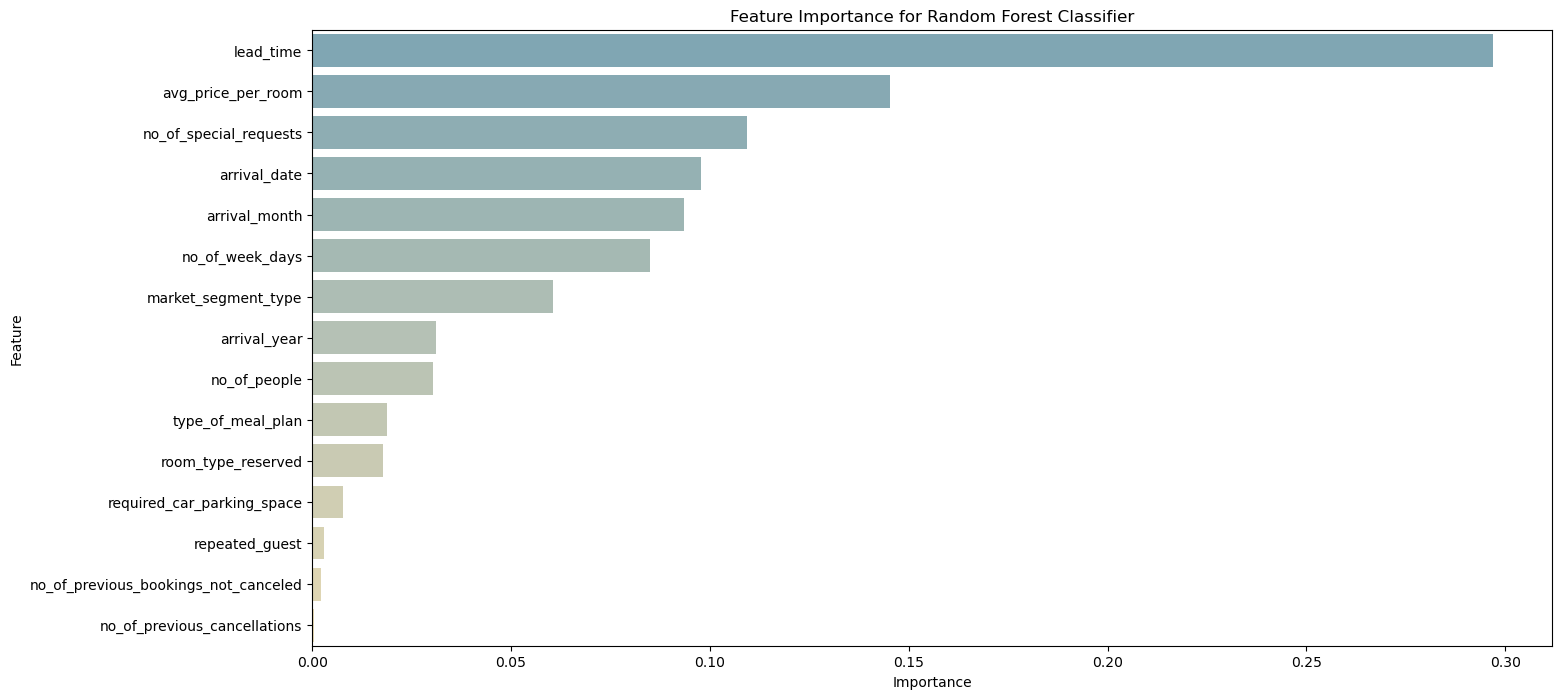

In [36]:
# Retrieve the feature importances
feature_importance = model.feature_importances_

# Initialize a DataFrame with feature names and the corresponding importance values
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

# Set the figure size and layout
plt.figure(figsize=(16,8))
plt.tight_layout(pad=2.0)

# Plot the feature importances
sns.barplot(data=importance_df, x="Importance", y="Feature", orient="h", palette="blend:#7AB,#EDA")

# Add labels and title
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Random Forest Classifier")

# Show the plot
plt.show()